### Diabetes prediction using logistic regression

### 1.Business Understanding

Pima hospital is experiencing diabetes rates and they would like to know to know the predictions of the diabetes and the best solution to reduce it. The hospital has tasked A Data scientist to predict the diabetes and give the best solution to reduce it

### 2.Data Understanding

This is done by assessing the data and trying to look to a data to figure out how you will answer the question. This is done by loading data and looking at it keenly.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [82]:
#load data set
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [83]:
#check the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [62]:
#check on the min, max, mean of the parameters
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [63]:
#check the rows and columns
df.shape

(768, 9)

In [64]:
## Names of the columns
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

### 3.EXPLORATORY DATA ANALYSIS

Data Cleaning

In [65]:
#check for missing values
df.isnull().sum().sort_values(ascending=False)

Outcome                     0
Age                         0
DiabetesPedigreeFunction    0
BMI                         0
Insulin                     0
SkinThickness               0
BloodPressure               0
Glucose                     0
Pregnancies                 0
dtype: int64

There are no missing values in the data

In [66]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [67]:
#since we can not have a skin thickness as zero, lets replace it with mean
df['SkinThickness'] = df['SkinThickness'].replace(0, df['SkinThickness'].mean())

In [68]:
#preview
df['SkinThickness'].head(8)

0    35.000000
1    29.000000
2    20.536458
3    23.000000
4    35.000000
5    20.536458
6    32.000000
7    20.536458
Name: SkinThickness, dtype: float64

In [69]:
#Insulin cannot be zero as well
df['Insulin'] = df['Insulin'].replace(0, df['Insulin'].mean())
df['Insulin'].head(6)

0     79.799479
1     79.799479
2     79.799479
3     94.000000
4    168.000000
5     79.799479
Name: Insulin, dtype: float64

In [70]:
#check duplicates
df.duplicated().sum()

0

The data has no duplicates

### 4.Data Visualization

### Insulin level and Age

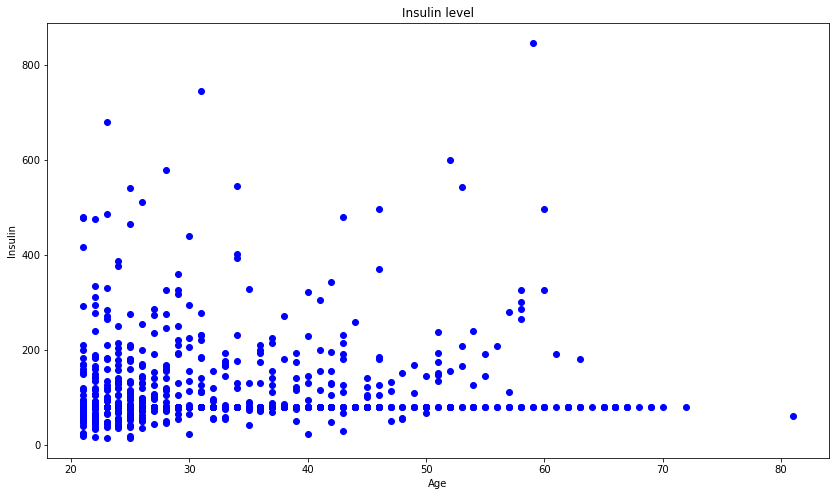

In [71]:
plt.figure(figsize=(14,8))
plt.scatter(x=df['Age'], y=df['Insulin'], color="blue")
plt.xlabel("Age")
plt.ylabel("Insulin")
plt.title("Insulin level")
plt.show()

from the above graph we can see that there are ouliers.

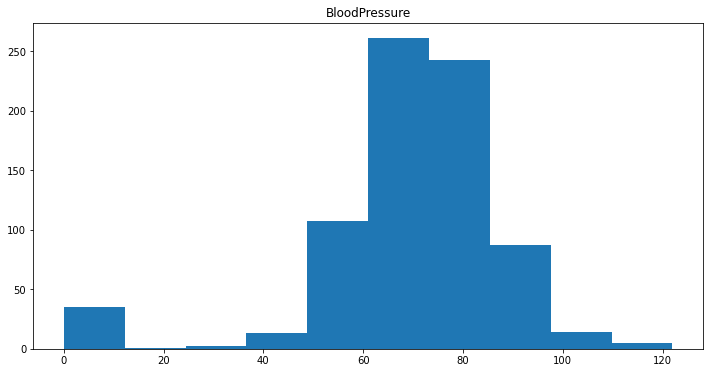

In [72]:
plt.figure(figsize=(12,6))
plt.hist(df["BloodPressure"])
plt.title("BloodPressure")
plt.show()

most individuals have a blood pressure of 60 to 85

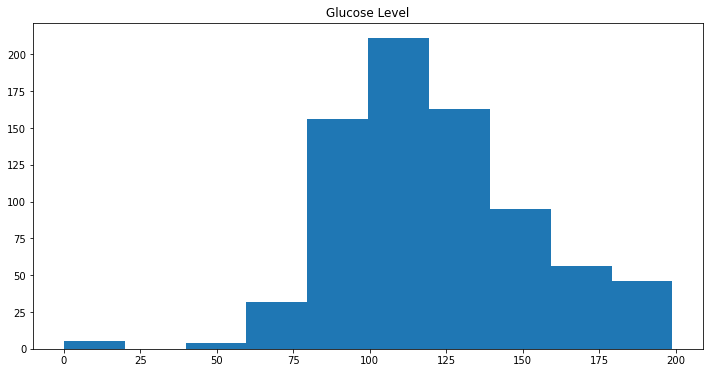

In [73]:
plt.figure(figsize=(12,6))
plt.hist(df["Glucose"])
plt.title("Glucose Level")
plt.show()

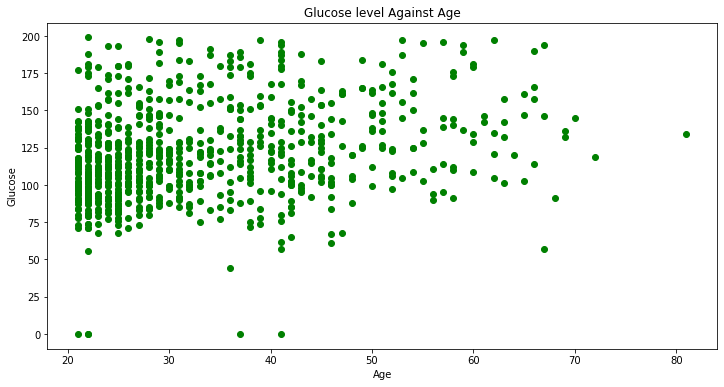

In [19]:
plt.figure(figsize=(12,6))
plt.scatter(x=df['Age'], y=df['Glucose'], color="green")
plt.title("Glucose level Against Age")
plt.xlabel("Age")
plt.ylabel("Glucose")
plt.show()

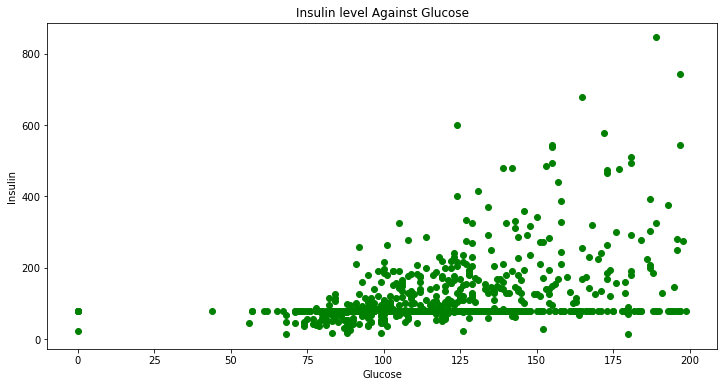

In [74]:
plt.figure(figsize=(12,6))
plt.scatter(x=df['Glucose'], y=df['Insulin'], color="green")
plt.title("Insulin level Against Glucose")
plt.xlabel("Glucose")
plt.ylabel("Insulin")
plt.show()

Remove outliers from the data for modelling

In [84]:
 #create a function that will help you remove outliers from the data
 def remove_outliers(dataFrame):
    for column_name in dataFrame.columns:
        Q1 = df[column_name].quantile(0.25)
        Q3 = df[column_name].quantile(0.75)
        IQR = Q3 - Q1
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR
        print(f"{column_name} lower limit: {lower_limit} \n upper_limit: {upper_limit}")
        dataFrame = dataFrame[(dataFrame[column_name] > lower_limit) | (dataFrame[column_name] < upper_limit)]
    return dataFrame


In [85]:
#remove outliers from the data
df = remove_outliers(df)

Pregnancies lower limit: -6.5 
 upper_limit: 13.5
Glucose lower limit: 37.125 
 upper_limit: 202.125
BloodPressure lower limit: 35.0 
 upper_limit: 107.0
SkinThickness lower limit: -48.0 
 upper_limit: 80.0
Insulin lower limit: -190.875 
 upper_limit: 318.125
BMI lower limit: 13.35 
 upper_limit: 50.550000000000004
DiabetesPedigreeFunction lower limit: -0.32999999999999996 
 upper_limit: 1.2
Age lower limit: -1.5 
 upper_limit: 66.5
Outcome lower limit: -1.5 
 upper_limit: 2.5


In [77]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.000000,79.799479,33.6,0.627,50,1
1,1,85,66,29.000000,79.799479,26.6,0.351,31,0
2,8,183,64,20.536458,79.799479,23.3,0.672,32,1
3,1,89,66,23.000000,94.000000,28.1,0.167,21,0
4,0,137,40,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48.000000,180.000000,32.9,0.171,63,0
764,2,122,70,27.000000,79.799479,36.8,0.340,27,0
765,5,121,72,23.000000,112.000000,26.2,0.245,30,0
766,1,126,60,20.536458,79.799479,30.1,0.349,47,1


### 5.Modelling

Split data into train and test

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
X = df.drop(["Outcome"], axis=1)
y = df["Outcome"]

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [90]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,0,0,0,0.0,0.304,21
618,9,112,82,24,0,28.2,1.282,50
346,1,139,46,19,83,28.7,0.654,22
294,0,161,50,0,0,21.9,0.254,65
231,6,134,80,37,370,46.2,0.238,46
...,...,...,...,...,...,...,...,...
71,5,139,64,35,140,28.6,0.411,26
106,1,96,122,0,0,22.4,0.207,27
270,10,101,86,37,0,45.6,1.136,38
435,0,141,0,0,0,42.4,0.205,29


In [91]:
y_train

60     0
618    1
346    0
294    0
231    1
      ..
71     0
106    0
270    1
435    1
102    0
Name: Outcome, Length: 614, dtype: int64

In [92]:
from sklearn.linear_model import LogisticRegression

In [93]:
import warnings
warnings.filterwarnings("ignore")

In [94]:
#Create our model
logReg = LogisticRegression()
#fit the model
logReg.fit(X_train, y_train)

LogisticRegression()

In [97]:
#checking the accuracy of the model
logReg.score(X_test, y_test)

0.7467532467532467

In [98]:
from sklearn.metrics import confusion_matrix, classification_report

In [99]:
#prediction
predictions = logReg.predict(X_test)

In [100]:
cm = confusion_matrix(y_test, predictions)

In [101]:
#call cm
cm

array([[78, 21],
       [18, 37]], dtype=int64)

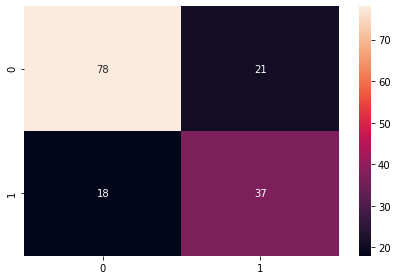

In [103]:
sns.heatmap(cm, annot=True)
plt.tight_layout()

In [104]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154

